# Introduction to Perceptron

My aim is to create the most bare-bones introduction to what a perceptron is, with no fluff whatsoever. This means no stories, no history lessons, no unnecessary pros/cons evaluations.  
This notebook assumes that you've read the STAT 479 slides in the `Slides` directory.

### Learning Aims
- Define what a perceptron is, and what its parameters are
- Understand the underlying math behind a perceptron implementation
- Grasp the intuition of the perceptron learning algorithm

In [1]:
! pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Defining the Perceptron

Make sure you understand line of code and its function in the codebox below.  
It is recommended you revisit the Perceptron Learning Algorithm (slide 28 of `L03_perceptron_slides.pdf`) before reading the code below. 

#### \_\_init\_\_
- `self.num_features`: Number of features that the perceptron will use to predict the output value. Let this be `i`, so `x_i` is the i-th feature.
- `self.weights`: The vector `W`, which must be fitted to the appropriate values through training. Has dimensionality (`i`, 1) because we take the dot product of this and the features.
- `self.bias`: The bias. Some refer to this as `w_0` but we implement it as a seperate variable in this example.

#### forward
Recall that the equation for a perceptron is `activation(W.x + b)`.
- `linear`: Calculation of `W.x + b`.
- `predictions`: The result of applying our piecewise activation on `linear`. This is now equivalent to the output of the perceptron equation.

#### backward
Funnily enough, this is not a normal 'backward' function that you would be used to in Pytorch, since it does not train the perceptron as well (that task got delegated to the train function). Don't take this layout by heart, we will have a sample of a Pytorch-worthy perceptron later (for gradient descent).
- `predictions`: The output of the perceptron.
- `errors`: The difference between the expected result and the predicted result (`y - yhat`). 

#### train
Please don't implement a real Pytorch model like this.  
- `x` is a `N`x`i` vector, where `N` is the number of training examples.
- `y` is a vector with length `N`.
In every epoch, for each training example `n`:
- Calculate the error of each training example (the funny reshaping code is for numpy magic to work, ignore that)
- Following the Perceptron Learning Algorithm, for each feature `i`, increment `W_i` by `error` * `x_i`. Implementation is vectorized.
- Following the Perceptron Learning Algorithm, increment the bias by the error. If you think of bias as `W_0` with constant `x_0 = 1`, this is equivalent to the above.

#### evaluate
`predictions == y` gives a boolean vector of how many predictions are correct. Dividing by the number of examples gives us the accuracy.

In [3]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float32)
        self.bias = np.zeros(1, dtype=np.float32)

    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = np.where(linear > 0., 1, 0)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for n in range(y.shape[0]):
                errors = self.backward(x[n].reshape(1, self.num_features), y[n]).reshape(-1)
                self.weights += (errors * x[n]).reshape(self.num_features, 1)
                self.bias += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

### Testing the 'basic' perceptron
You shouldn't need to analyse any of the below unless you're not confident in your CS4132 prerequisites.  
The task here is a very simple binary classification task to seperate two clusters. The two features passed into the model are the x and y position of the point. You will see a visualisation of the data in the final codebox.

In [4]:
! wget https://github.com/rasbt/stat479-deep-learning-ss19/raw/refs/heads/master/L03_perceptron/code/data/perceptron_toydata.txt

--2025-01-30 21:15:44--  https://github.com/rasbt/stat479-deep-learning-ss19/raw/refs/heads/master/L03_perceptron/code/data/perceptron_toydata.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
20.205.243.166ub.com (github.com)... 
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rasbt/stat479-deep-learning-ss19/refs/heads/master/L03_perceptron/code/data/perceptron_toydata.txt [following]
--2025-01-30 21:15:45--  https://raw.githubusercontent.com/rasbt/stat479-deep-learning-ss19/refs/heads/master/L03_perceptron/code/data/perceptron_toydata.txt
185.199.108.133, 185.199.109.133, 185.199.110.133, ...tent.com)... 
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
200 OKequest sent, awaiting response... 
Length: 1287 (1.3K) [text/plain]
Saving to: ‘perceptron_toydata.txt.1’

perceptron_toydata. 100%[============

In [5]:
data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(np.int32)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [50 50]
X.shape: (100, 2)
y.shape: (100,)


Now, we can finally evaluate the performance of this single perceptron.

In [6]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Model parameters:


  Weights: [[1.2734085]
 [1.3464228]]

  Bias: [-1.]

Test set accuracy: 93.33%


### Plotting the decision boundary
Observe the graph below. You can observe that the perceptron splits the data (almost) cleanly into its two clusters. Since the test accuracy is so high, you'd expect this result. But let's try to grasp the intuition of why this visualisation is even possible.  

For the cluster on the right of the line, where the classification is `1`, the value of `Wx + b` must be positive. Similarly, for the cluster on the left, the classification is `0` and hence the value of `Wx + b` must be negative. This is due to our activation function being defined as such. As such, we want to find `Wx + b` = 0 as this would be the boundary between being classified as 0 or 1.  

Let `W_0` stand for the weight for the x term, and `W_1` for the weight of the y term. Let `x_0`, and `x_1` be the x and y term respectively.  
Since `W` and `x` are vectors, `Wx + b` = `W.x + b` = `W_0 * x_0 + W_1 * x_1 + b`.  
Now, if you would forgive the moral trespass of defining a variable twice, we can now redifine the terms in terms of the x- and y- variables that we want to plot.  
`W_0 * x_0 + W_1 * x_1 + b` = `W_x*x + W_y*y + b` = `ax + by - c` (equation of a line!) = 0. 

Solving for y:  
- `by = -ax + c`
- `y = (-ax + c) / b`
- `  = (-(W_x)x + (-b)) / W-y` (with intermediate variable scheme)
- `  = (-(W_0*x_0) - b) / W_1` (with original variable scheme)

This is exactly the formula used in `y_min` and `y_max` below!

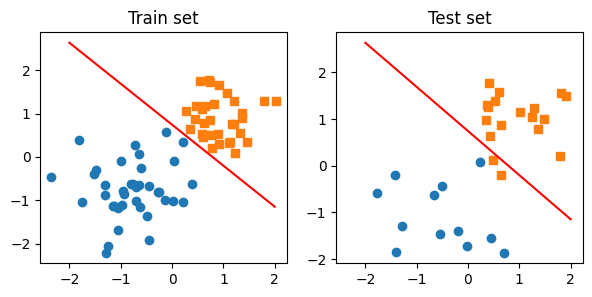

In [7]:
w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max], color="red")
ax[1].plot([x_min, x_max], [y_min, y_max], color="red")

ax[0].set_title("Train set")
ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].set_title("Test set")
ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

plt.show()

### Sources
- https://github.com/rasbt/stat479-deep-learning-ss19/blob/master/L03_perceptron/code/perceptron-numpy.ipynb (Main source)
- https://thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron